#Laboratorio 2

Nombre: Juan Agustin Apaza Guzman

Dataset: https://www.kaggle.com/datasets/yakhyojon/automatidata?select=2017_Yellow_Taxi_Trip_Data.csv

18 propiedades y tiene 22699 ejemplos

In [252]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [253]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Regresión lineal con multiples variables
Implementamos la regresión lineal multivariable para encontrar los parámetros theta que mejor predicen el total_amount.
Paso 1: Preparación y Normalización de Datos
Primero, cargamos los datos y seleccionamos las características relevantes, que en este caso son trip_distance, fare_amount, extra, mta_tax, tip_amount, y tolls_amount. 

In [254]:
# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/Tareas/Inteligencia artificial SIS420/datasets/2017_Yellow_Taxi_Trip_Data.csv/2017_Yellow_Taxi_Trip_Data.csv')

# Mostrar las primeras filas del dataset para entender su estructura
print(data.head())

   Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1    35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2   106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3    38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4    30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0 

#Seleccion de caracteristicas 'x' y la variable 'y'

In [255]:
# Seleccionamos las características relevantes
# Por ejemplo, podríamos elegir 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount'
X = data[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']]

# La variable objetivo es el 'total_amount'
y = data['total_amount']

# Número de ejemplos en el dataset
m = y.size
print(f'Número de ejemplos en el dataset: {m}')


Número de ejemplos en el dataset: 22699


# Normalización de características
La normalización se realiza para escalar las características de manera que todas estén en un rango similar, evitando que alguna característica con valores grandes domine las demás durante el entrenamiento.

In [256]:
def featureNormalize(X):
    # Crear copias para evitar modificar el original
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcular la media y la desviación estándar
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Normalizar las características
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normalizamos las características
X_norm, mu, sigma = featureNormalize(X)

# Verificar los valores normalizados
print(X_norm.head())


   trip_distance  fare_amount     extra   mta_tax  tip_amount  tolls_amount
0       0.116802    -0.002011 -0.719681  0.064747    0.330012     -0.223375
1      -0.304759     0.224515 -0.719681  0.064747    0.772779     -0.223375
2      -0.523752    -0.492818 -0.719681  0.064747   -0.137751     -0.223375
3       0.215348     0.564305 -0.719681  0.064747    1.626179     -0.223375
4       0.398755     0.262270  0.360031  0.064747   -0.655504     -0.223375


# Añadir el término de intersección (columna de unos) a X

In [257]:
# Añadir una columna de unos a X (para el término de intersección)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(f'X después de añadir la columna de unos:\n{X[:5]}')


X después de añadir la columna de unos:
[[ 1.          0.11680167 -0.00201075 -0.71968127  0.06474688  0.33001156
  -0.2233746 ]
 [ 1.         -0.30475918  0.22451549 -0.71968127  0.06474688  0.77277943
  -0.2233746 ]
 [ 1.         -0.52375182 -0.49281761 -0.71968127  0.06474688 -0.13775126
  -0.2233746 ]
 [ 1.          0.21534836  0.56430485 -0.71968127  0.06474688  1.62617878
  -0.2233746 ]
 [ 1.          0.3987547   0.26226986  0.3600309   0.06474688 -0.65550401
  -0.2233746 ]]


# Implementación del descenso por el gradiente
Función de Costo: Calcula qué tan lejos están las predicciones del modelo de los valores reales.
Descenso por Gradiente: Optimiza los parámetros theta minimizando la función de costo iterativamente.

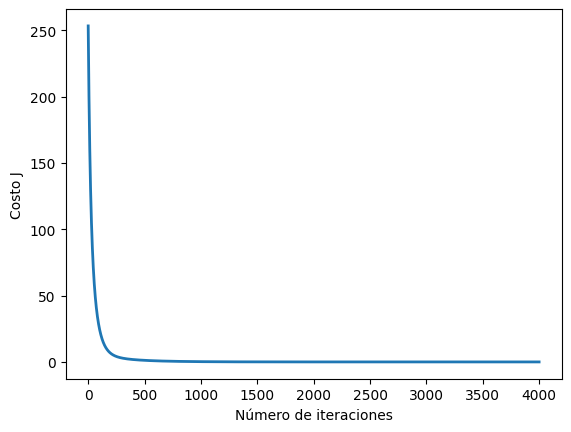

Theta calculado por el descenso por el gradiente: [1.63105022e+01 5.06155622e-03 1.32423665e+01 4.60009778e-01
 5.01152000e-02 2.80383944e+00 1.39854695e+00]


In [258]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]  # Número de ejemplos de entrenamiento
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # Número de ejemplos de entrenamiento
    theta = theta.copy()  # Crear una copia de theta
    J_history = []  # Para almacenar la historia del costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# Inicializamos theta con ceros
theta = np.zeros(X.shape[1])

# Configuración del descenso por el gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iters = 4000  # Número de iteraciones

# Ejecutar el descenso por el gradiente
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Mostrar los resultados finales
print(f'Theta calculado por el descenso por el gradiente: {theta}')


# Predicción con el modelo ajustado
Podemos usar el modelo entrenado para hacer predicciones. Por ejemplo, predecir el total_amount para un viaje con ciertas características:

In [259]:
# Ejemplo de valores de entrada (modifica según lo que quieras predecir)
# Supongamos que tenemos un viaje con una distancia de 2 millas, una tarifa de $10, un extra de $0.50, un MTA tax de $0.50, un tip de $1.50, y tolls de $0
X_example = [1, 2, 10, 0.5, 0.5, 1.5, 0]

# Normalizamos las características usando los valores mu y sigma que calculamos anteriormente
X_example[1:] = (X_example[1:] - mu) / sigma

# Realizamos la predicción
predicted_total_amount = np.dot(X_example, theta)
print(f'El total_amount predicho para el viaje es: ${predicted_total_amount:.2f}')


El total_amount predicho para el viaje es: $12.80


# Implementación de la ecuación normal (opcional)
Si quieres probar la ecuación normal, que no requiere de iteraciones:

In [260]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Calcular theta usando la ecuación normal
theta_normal = normalEqn(X, y)

# Predicción con la ecuación normal
predicted_total_amount_normal = np.dot(X_example, theta_normal)
print(f'El total_amount predicho con la ecuación normal es: ${predicted_total_amount_normal:.2f}')


El total_amount predicho con la ecuación normal es: $12.80


# Paso 3: Regresión Polinómica
se eleva una característica al cuadrado, para capturar relaciones no lineales entre las características y el total_amount.

La regresión polinómica expande las características originales con términos al cuadrado (o a otras potencias) para capturar mejor las complejidades en los datos que una regresión lineal simple podría no captar

In [261]:
# Primero, debemos cargar las bibliotecas necesarias
import os
# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# Normalización de caracteristicas
Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [262]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = pd.read_csv('/content/gdrive/MyDrive/Tareas/Inteligencia artificial SIS420/datasets/2017_Yellow_Taxi_Trip_Data.csv/2017_Yellow_Taxi_Trip_Data.csv')
 # Suponiendo que deseas trabajar con la primera columna para X y una columna específica para y (por ejemplo, la columna 2)
# Convertir las columnas X e y a tipo flotante
X = data.iloc[:, 5:6].values.astype(float)  # Convertir a float
y = data.iloc[:, 11].values.astype(float)  # Convertir a float
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
for i in range(20):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

       3        13
       2        16
       1         6
       4        20
       4        16
       2         9
      13        48
       3        16
       1         9
       2        13
       2        12
      19        52
       3        15
       2        10
       3        18
       6        19
       4        12
       2        10
       1         5
       3        12


In [263]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


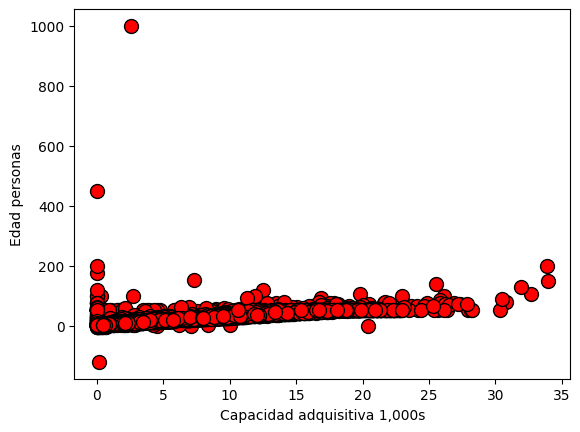

In [264]:
plotData(X, y)

In [265]:
X = np.concatenate([X, X * X], axis=1)

In [266]:
print(X)

[[ 3.34   11.1556]
 [ 1.8     3.24  ]
 [ 1.      1.    ]
 ...
 [ 0.42    0.1764]
 [ 2.36    5.5696]
 [ 2.1     4.41  ]]


#Normalización de características
es necesario normalizar X para que el algoritmo de descenso de gradiente funcione eficientemente.

In [267]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1]) #calcular la media
    sigma = np.zeros(X.shape[1]) #calcular la desviacion estandar

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [268]:
# Expansión polinómica de segundo grado
X_poly = np.concatenate([X_norm, X_norm ** 2], axis=1)

# Añadir una columna de unos para el término de intersección (bias term)
X_poly = np.concatenate([np.ones((X_poly.shape[0], 1)), X_poly], axis=1)

print(X_poly[:5])  # Mostrar las primeras filas de X expandido


[[ 1.00000000e+00  1.16801665e-01 -2.01075013e-03 -7.19681272e-01
   6.47468833e-02  3.30011561e-01 -2.23374601e-01  1.36426290e-02
   4.04311609e-06  5.17941134e-01  4.19215889e-03  1.08907630e-01
   4.98962122e-02]
 [ 1.00000000e+00 -3.04759178e-01  2.24515491e-01 -7.19681272e-01
   6.47468833e-02  7.72779426e-01 -2.23374601e-01  9.28781564e-02
   5.04072057e-02  5.17941134e-01  4.19215889e-03  5.97188040e-01
   4.98962122e-02]
 [ 1.00000000e+00 -5.23751823e-01 -4.92817606e-01 -7.19681272e-01
   6.47468833e-02 -1.37751264e-01 -2.23374601e-01  2.74315972e-01
   2.42869193e-01  5.17941134e-01  4.19215889e-03  1.89754108e-02
   4.98962122e-02]
 [ 1.00000000e+00  2.15348356e-01  5.64304853e-01 -7.19681272e-01
   6.47468833e-02  1.62617878e+00 -2.23374601e-01  4.63749144e-02
   3.18439967e-01  5.17941134e-01  4.19215889e-03  2.64445742e+00
   4.98962122e-02]
 [ 1.00000000e+00  3.98754697e-01  2.62269865e-01  3.60030902e-01
   6.47468833e-02 -6.55504010e-01 -2.23374601e-01  1.59005308e-01


In [269]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [270]:
print(X_norm)

[[ 0.11680167 -0.16161988]
 [-0.30475918 -0.28144143]
 [-0.52375182 -0.31534919]
 ...
 [-0.68252149 -0.32781635]
 [-0.15146433 -0.24617736]
 [-0.22263694 -0.26373068]]


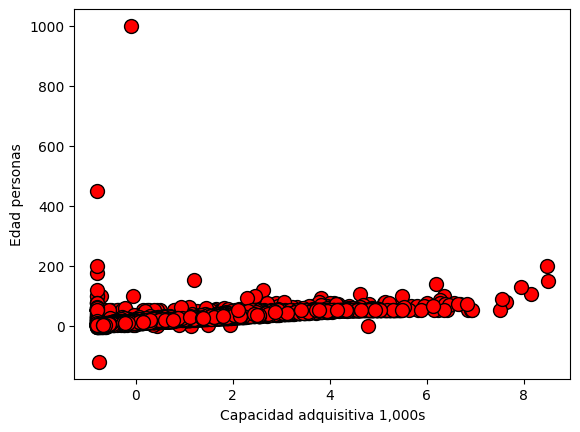

In [271]:
plotData(X_norm[:,0], y)

In [272]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [273]:
print(X)

[[ 1.          0.11680167 -0.16161988]
 [ 1.         -0.30475918 -0.28144143]
 [ 1.         -0.52375182 -0.31534919]
 ...
 [ 1.         -0.68252149 -0.32781635]
 [ 1.         -0.15146433 -0.24617736]
 [ 1.         -0.22263694 -0.26373068]]


# Implementación del descenso por gradiente
Ahora implementamos el algoritmo de descenso por gradiente para encontrar los parámetros óptimos theta.

In [274]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [275]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

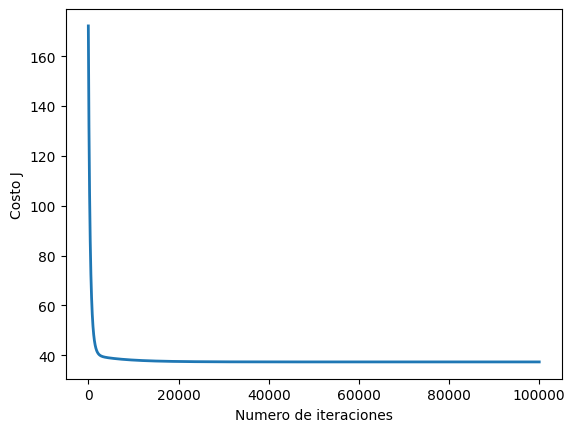

theta calculado por el descenso por el gradiente: [13.02662937 11.53337639 -1.63260101]


In [276]:
# Parámetros para el descenso por gradiente
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # Tasa de aprendizaje
num_iters = 100000 # Número de iteraciones

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
plt.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
# X_array = [1, 34, 1156]
# X_array[1:3] = (X_array[1:3] - mu) / sigma
# price = np.dot(X_array, theta)   # Se debe cambiar esto

# print('La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): ${:.0f}'.format(price))

# Hacer predicciones con el modelo
Finalmente, podemos usar los parámetros theta obtenidos para predecir el valor de y para un nuevo valor de X. Por ejemplo, predeciremos el total_amount para un trip_distance de 5.0 millas.

In [277]:
# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/Tareas/Inteligencia artificial SIS420/datasets/2017_Yellow_Taxi_Trip_Data.csv/2017_Yellow_Taxi_Trip_Data.csv')
 # Suponiendo que deseas trabajar con la primera columna para X y una columna específica para y (por ejemplo, la columna 2)
# Convertir las columnas X e y a tipo flotante
X = data.iloc[:, 5:6].values.astype(float)  # Convertir a float
y = data.iloc[:, 11].values.astype(float)  # Convertir a float
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Paso 4: Ecuación de la Normal
La ecuación de la normal encuentra los parámetros theta directamente utilizando álgebra lineal, sin necesidad de iteraciones, lo que puede ser más rápido para pequeños conjuntos de datos.

In [278]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

#Usando la media y desviación estándar previamente calculadas.
Luego, se utiliza un valor específico de trip_distance (5.0 millas) para predecir el total_amount aplicando los parámetros theta obtenidos. Esto permite estimar el costo total de un viaje en taxi de 5 millas usando el modelo entrenado.

In [279]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar el total_amount para una trip_distance específica
# Supongamos que queremos estimar el total_amount para una trip_distance de 5 millas

# Normalizamos el valor de trip_distance de acuerdo a la media y desviación estándar calculadas
trip_distance = 5.0
X_array = [1, (trip_distance - mu[0]) / sigma[0], ((trip_distance - mu[0]) / sigma[0])**2]

# Calcular el total_amount usando los parámetros theta obtenidos
predicted_total_amount = np.dot(X_array, theta)

print('Total amount para una trip distance de 5.0 millas (usando la ecuación de la normal): ${:.2f}'.format(predicted_total_amount))

Theta calculado a partir de la ecuación de la normal: [ 4.3662875   3.15839369 -0.02478178]
Total amount para una trip distance de 5.0 millas (usando la ecuación de la normal): $6.16


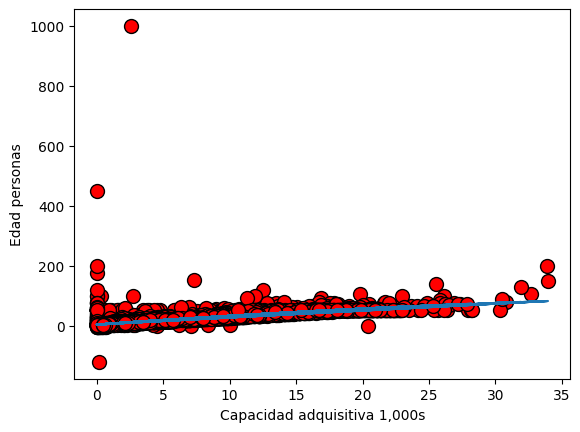

In [280]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [283]:
# Supongamos que has normalizado correctamente las características y `theta` tiene 3 elementos
# y se requiere una expansión polinómica de segundo grado

# Genera 100 valores de distancia de viaje entre 0.5 y 50 millas
trip_distances = np.linspace(0.5, 50, 100)

# Normaliza las distancias utilizando los valores de mu y sigma
trip_distances_norm = (trip_distances - mu[0]) / sigma[0]

# Expansión polinómica de segundo grado y añadir el término de intersección
trip_distances_poly = np.column_stack([np.ones(trip_distances_norm.shape[0]), trip_distances_norm, trip_distances_norm**2])

# Hacer las predicciones utilizando theta
predictions = np.dot(trip_distances_poly, theta)

# Imprimir las primeras 10 predicciones como ejemplo
for i in range(100):
    print(f'Predicción para trip_distance de {trip_distances[i]:.2f} millas: ${predictions[i]:.2f}')

# Si deseas guardar las predicciones en un archivo para análisis posterior
# predicciones_df = pd.DataFrame({'trip_distance': trip_distances, 'total_amount_pred': predictions})
# predicciones_df.to_csv('predicciones.csv', index=False)


Predicción para trip_distance de 0.50 millas: $2.27
Predicción para trip_distance de 1.00 millas: $2.71
Predicción para trip_distance de 1.50 millas: $3.14
Predicción para trip_distance de 2.00 millas: $3.58
Predicción para trip_distance de 2.50 millas: $4.01
Predicción para trip_distance de 3.00 millas: $4.44
Predicción para trip_distance de 3.50 millas: $4.87
Predicción para trip_distance de 4.00 millas: $5.30
Predicción para trip_distance de 4.50 millas: $5.73
Predicción para trip_distance de 5.00 millas: $6.16
Predicción para trip_distance de 5.50 millas: $6.59
Predicción para trip_distance de 6.00 millas: $7.02
Predicción para trip_distance de 6.50 millas: $7.44
Predicción para trip_distance de 7.00 millas: $7.87
Predicción para trip_distance de 7.50 millas: $8.29
Predicción para trip_distance de 8.00 millas: $8.72
Predicción para trip_distance de 8.50 millas: $9.14
Predicción para trip_distance de 9.00 millas: $9.56
Predicción para trip_distance de 9.50 millas: $9.98
Predicción p